# PRICE OPTIMIZATION

**Goal:**
  - The goal is to develop a dynamic pricing model that optimizes the prices of items to maximize revenue while remaining competitive in the market. This involves:
    - Analyzing the current pricing strategy and its impact on sales and revenue.
    - Comparing our pricing strategy with that of the competition to identify gaps and opportunities.
    - Developing a dynamic pricing model that adjusts prices based on factors such as competitor pricing, demand elasticity, and market trends.
    - Implementing and simulating the dynamic pricing model to compare its performance against the existing pricing strategy.
        
**About The Dataset:**
- The dataset contains pricing information for various items sold at a retail store and their corresponding prices at competing stores. The dataset includes the following columns:
  
  - Fiscal_Week_Id: The fiscal week identifier.
  - Store_Id: The store identifier.
  - Item_Id: The item identifier.
  - Price: The price of the item at our store.
  - Item_Quantity: The quantity of the item sold.
  - Sales_Amount_No_Discount: Sales amount without discount.
  - Sales_Amount: Sales amount after discounts.
  - Competition_Price: The price of the item at a competing store.

- The data spans multiple fiscal weeks and includes various items across different categories, providing a comprehensive view of pricing strategies and sales performance.tegy.

**Import Necessary Dependencies:**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read and Explore the dataset:**

In [5]:
price = pd.read_csv('competitive_price.csv')

In [7]:
price.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [8]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [9]:
price.describe()

,Index,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,167.017783,399.611320,4771.147859,11396.865217,174.280887
std,28867.657797,69.503418,59.440567,1524.737540,2091.246764,71.545584
min,0.000000,47.700000,285.000000,2003.700000,7613.560000,47.950000
25%,24999.750000,105.410000,348.000000,3481.460000,9551.590000,118.627500
50%,49999.500000,159.420000,401.000000,4746.530000,11240.020000,162.510000
75%,74999.250000,221.900000,451.000000,6045.477500,13175.230000,237.335000
max,99999.000000,310.660000,522.000000,7853.810000,15685.080000,313.640000


**Comparing the Price Distribution with the Competition:**

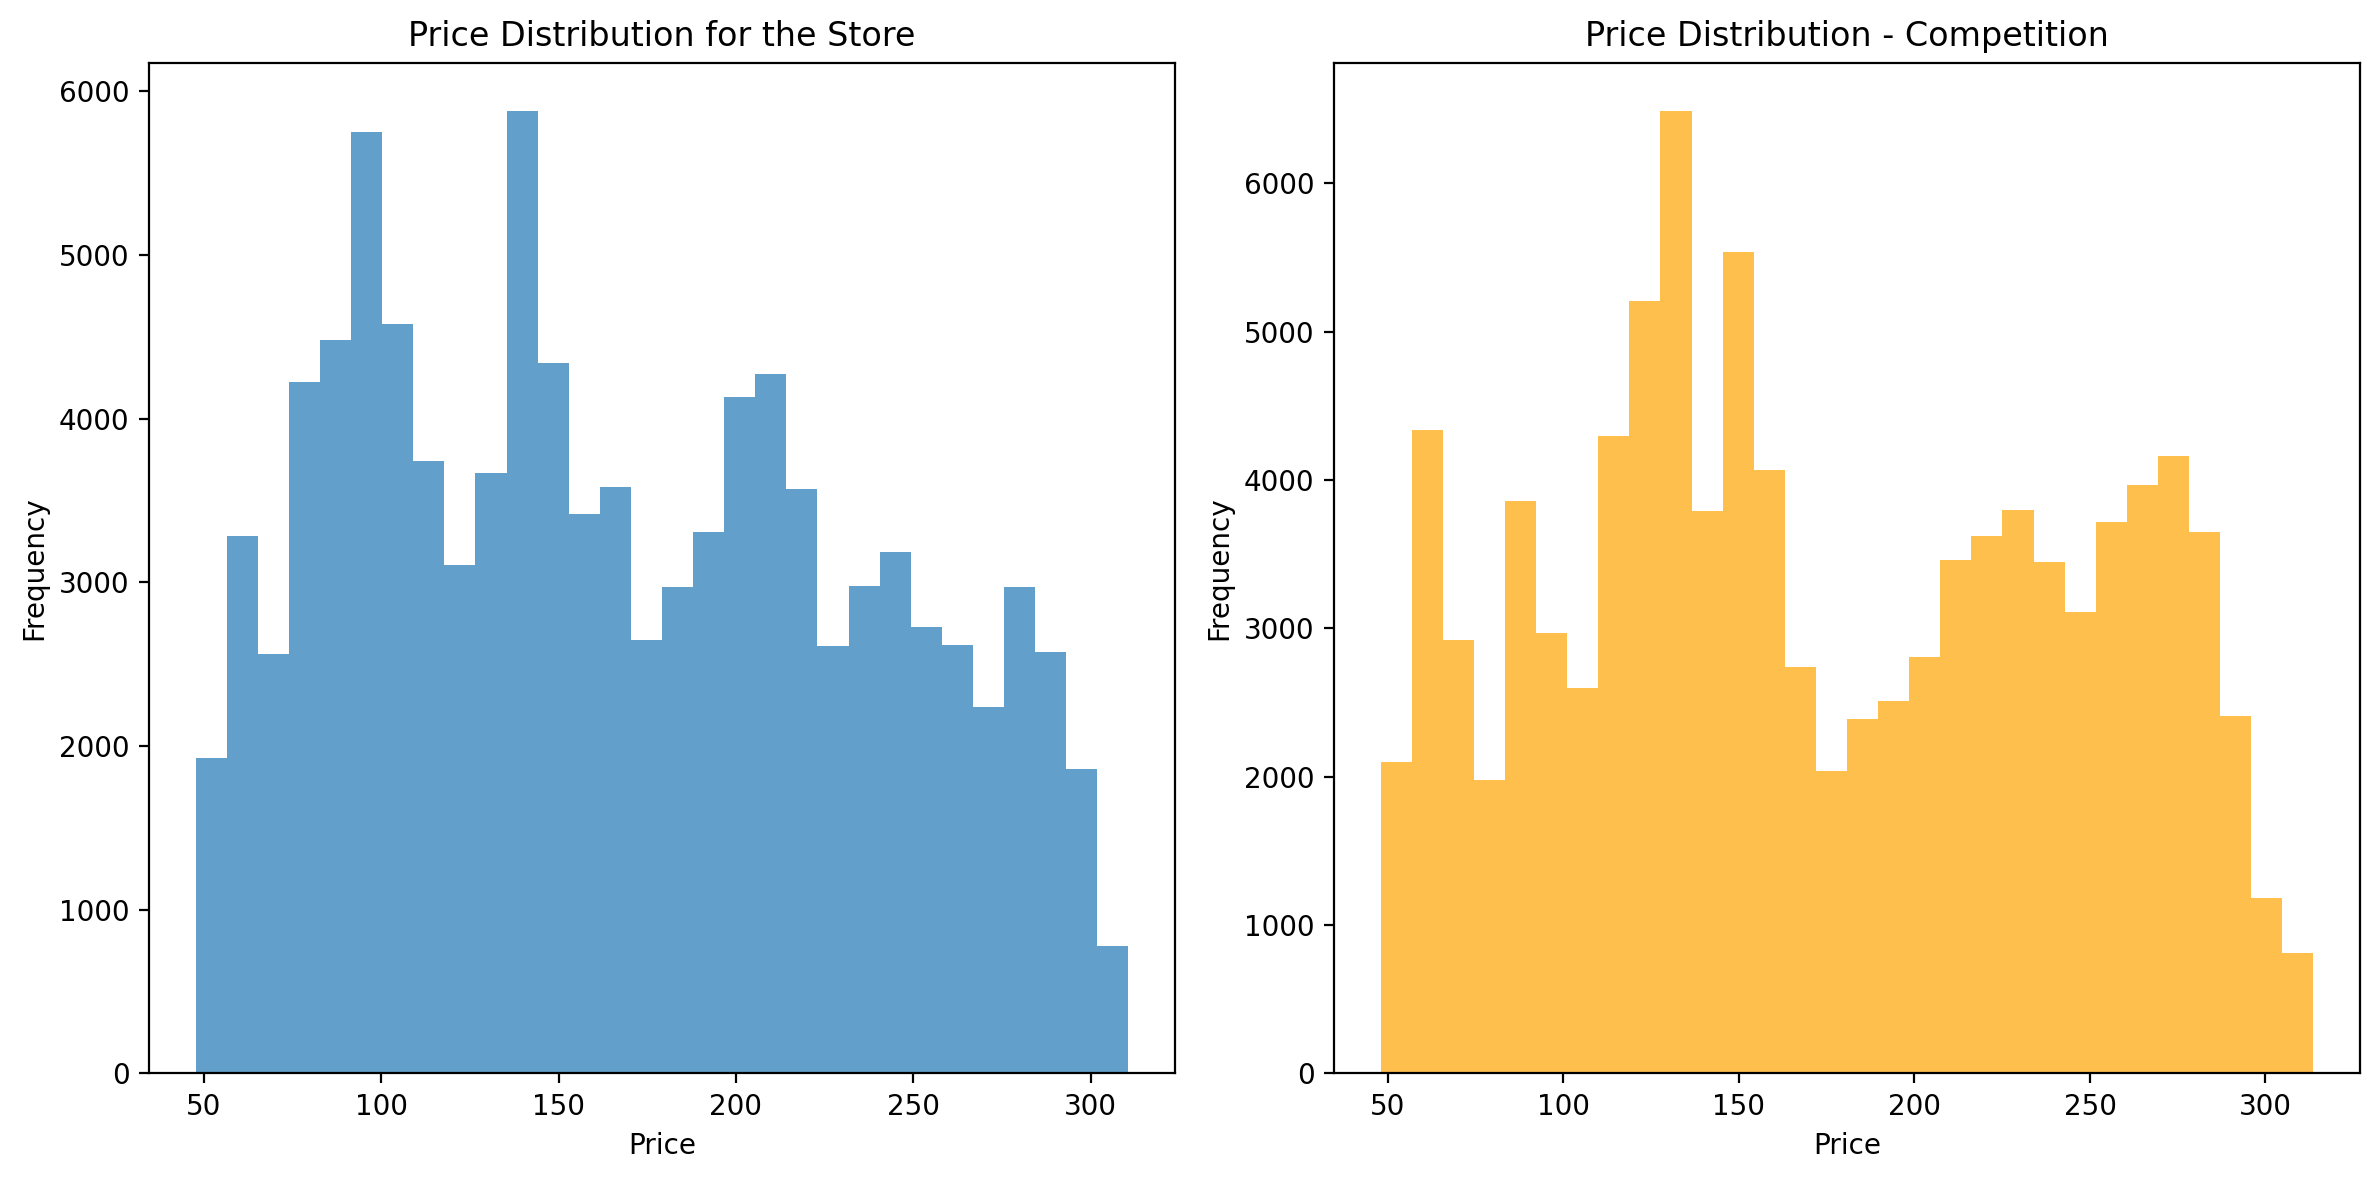

In [13]:
plt.figure(figsize = (12,6), dpi =200)

plt.subplot(1, 2, 1)
plt.hist(price['Price'], bins=30, alpha=0.7, label='Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution for the Store')

plt.subplot(1, 2, 2)
plt.hist(price['Competition_Price'], bins=30, alpha=0.7, color='orange', label='Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()

Figure 1.0 above shows that the competition’s prices are generally higher, with peaks around the 100-150 and 200-250 price ranges, which indicate a concentration of higher-priced items. In contrast, our store’s prices are more evenly distributed across the 50-300 range, with notable peaks around 100-150.

**Relationship Between Price And Sales**

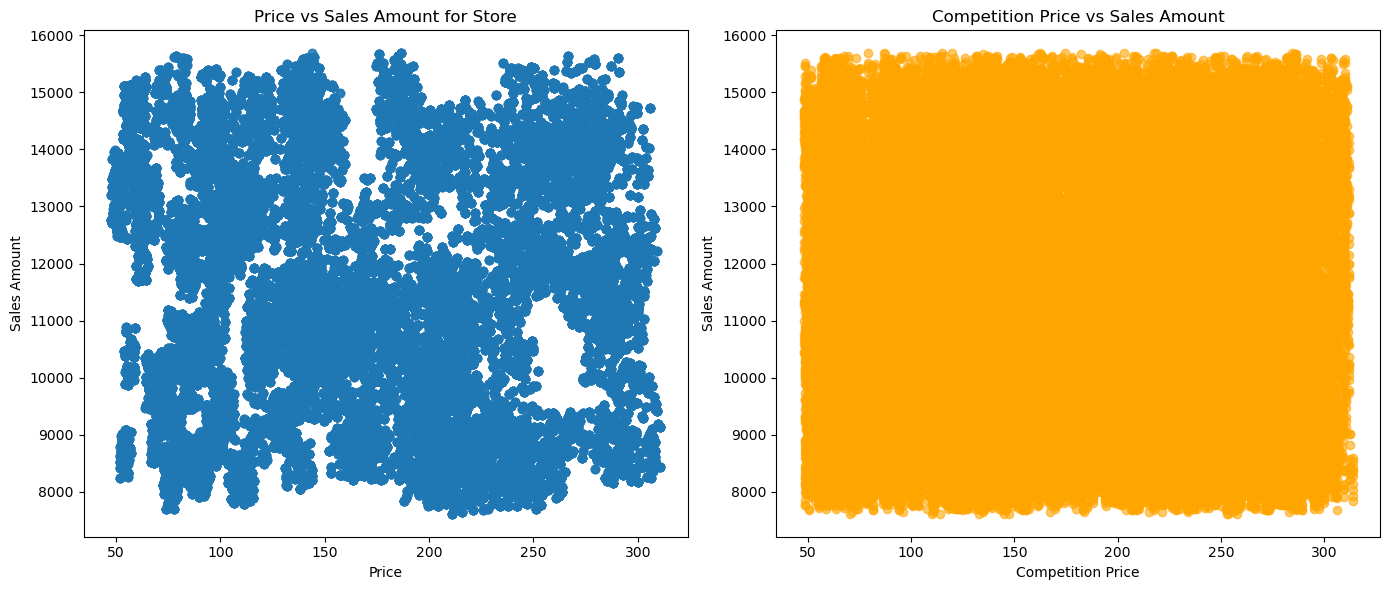

In [14]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(price['Price'], price['Sales_Amount'], alpha=0.6, label='Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount for Store')

plt.subplot(1, 2, 2)
plt.scatter(price['Competition_Price'], price['Sales_Amount'], alpha=0.6, color='orange', label='Competition')
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')

plt.tight_layout()

Figure 2 above compares the relationship between price and sales amount for the store (left) and the competition (right). For the store, the plot shows a wide dispersion of sales amounts across various price points, which indicates varied performance in different price ranges without a clear trend. In contrast, the competition’s plot shows a dense clustering of sales amounts around higher values, with prices also spread across a similar range but demonstrating a more consistent sales performance. It suggests that the competition might have a more effective pricing strategy, which maintains higher sales amounts more uniformly across different price points.

**Comparing The Price Changes Overtime**

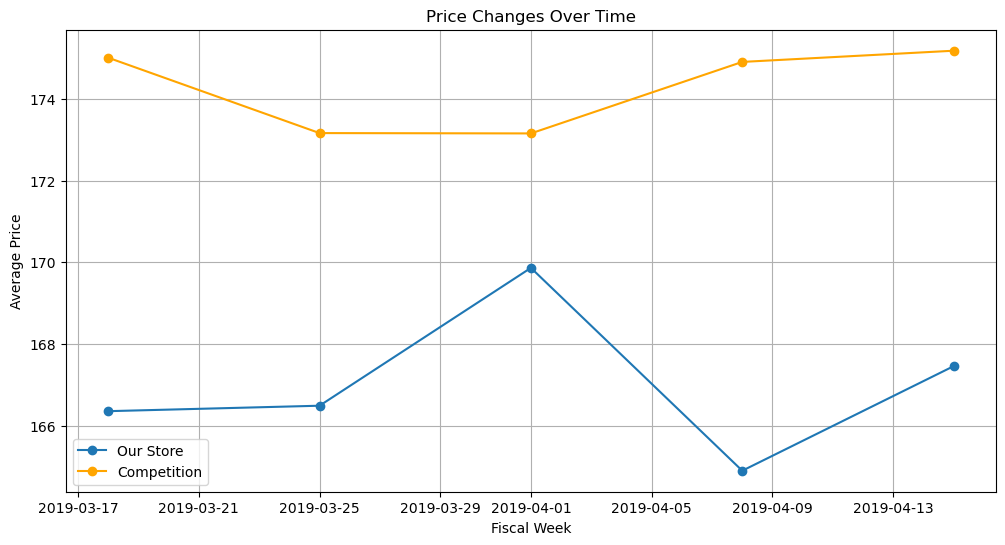

In [15]:
price['Fiscal_Week_ID'] = pd.to_datetime(price['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

weekly_prices = price.groupby('Fiscal_Week_ID').agg({'Price': 'mean','Competition_Price': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Our Store', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competition', marker='o', color='orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)

Figure 3: The competition maintains higher average prices consistently above 170, with a slight upward trend over the observed weeks. In contrast, the store’s prices start around 166, increase slightly, then dip before rising again. It indicates that the competition follows a more stable pricing strategy, while the store experiences more fluctuations in pricing. The stability in the competition’s pricing could be contributing to their higher and more consistent sales performance.

**Price Elasticity:**

In order to analyze how changes in prices affect the change in quantity sold. For this, we need to calculate price elasticity. Using the formula below;
- Price Elastiicty = Percenatage in quantity demanded / Percentage Change in Price

In [16]:
price['price_change'] = price['Price'].pct_change()
price['qty_change'] = price['Item_Quantity'].pct_change()

price['elasticity'] = price['qty_change'] / price['price_change']

price.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
price.dropna(subset=['elasticity'], inplace=True)

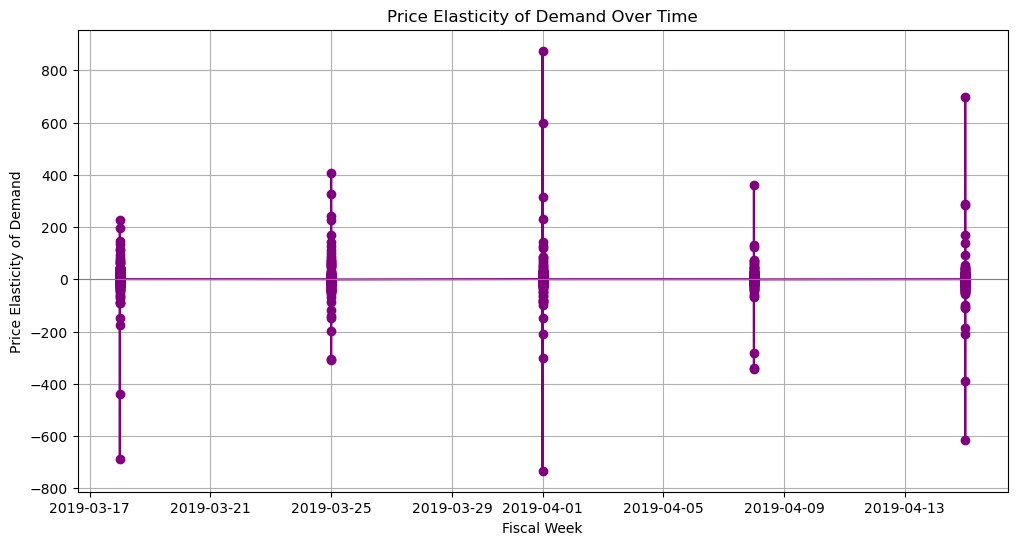

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(price['Fiscal_Week_ID'], price['elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)

Thus figure 4, shows the price elasticity of demand over time. It highlights significant variability in elasticity across different weeks, with values ranging from highly negative to highly positive. It indicates that the sensitivity of quantity demanded to price changes fluctuates considerably. High positive elasticity suggests that in some weeks, demand increased significantly with price increases, while high negative elasticity in other weeks indicates a sharp drop in demand with price hikes. The broad spread of elasticity values implies an inconsistent response to price changes, which suggests that factors other than price, such as promotions, seasonality, or market conditions, might be influencing demand.

**Comparing the total sales ammount and the competition:**

In [18]:
total_sales_your_store = price['Sales_Amount'].sum()
total_sales_competition = (price['Competition_Price'] * price['Item_Quantity']).sum()

total_qty_your_store = price['Item_Quantity'].sum()
total_qty_competition = price['Item_Quantity'].sum()  # assuming quantities sold are the same for comparison

summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'store': [total_sales_your_store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
})

summary

,Metric,store,Competition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


Thus, the store’s total sales amount is 114,100,500, whereas the competition’s total sales amount is 696,209,700 (assuming equal quantity sold). The competition has a significantly higher total sales amount compared to the store's amount. It indicates that their pricing strategy is more effective in generating revenue.

- Analyzing The Sales Amount Across Various Different Price Bracket:
Thus to identify if there are specific price ranges where the competition outperforms our store.

In [22]:
# define price brackets

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
price['price_bracket'] = pd.cut(price['Price'], bins=bins, labels=labels, right=False)
price['competition_price_bracket'] = pd.cut(price['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = price.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
price['competition_sales_amt'] = price['Competition_Price'] * price['Item_Quantity']
sales_by_bracket_competition = price.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


The table above shows the total sales amounts for both the store and the competition across different price brackets. Here are some key observations:

- 0-50 Bracket: The competition has significantly higher sales in this bracket.
- 51-100 Bracket: The competition outperforms our store by a wide margin.
- 101-150 Bracket: The competition’s sales are much higher than our store’s sales.
- 151-200 Bracket: The competition again has significantly higher sales.
- 201-250 Bracket: The competition’s sales are nearly double those of our store.
- 251-300 Bracket: The competition has higher sales, but the gap is smaller compared to other brackets.
- 301-350 Bracket: The competition has higher sales, though the overall sales amount is lower in this bracket compared to others.

**Price Optimization with Dynamic Pricing:**
The following are the steps for a dynamic pricing model and simulating its performance.

 - Enhancing the dataset to include segments and calculate price elasticity for each segment.
 - Create segments based on purchasing behaviour and calculate price elasticity for each segment.
 - Define dynamic pricing rules based on competitor pricing, demand, and elasticity.
 - Hence, simulate the dynamic pricing model and compare it with the existing pricing strategy.

In [23]:
# segment customers based on purchasing behavior

# calculate average price and total quantity sold for each item
item_summary = price.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
price = pd.merge(price, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price
price['segment'] = pd.cut(price['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment
segments = price['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = price[price['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

C:\Users\BenJ\AppData\Local\Temp\ipykernel_5904\1347939649.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
C:\Users\BenJ\AppData\Local\Temp\ipykernel_5904\1347939649.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
C:\Users\BenJ\AppData\Local\Temp\ipykernel_5904\1347939649.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,segment,avg_elasticity
0,Medium,0.071118
1,High,0.143993


In the above code, we are segmenting customers based on their purchasing behaviour by analyzing the average price and total quantity sold for each item. 

First, we calculated the average price and total quantity sold for each item and merged this summary back into the main dataset. We then defined customer segments based on these average prices into three categories: 
- Low,
- Medium, and
- High.
  - For each segment, we calculated the price elasticity of demand by measuring how the percentage change in price affects the percentage change in quantity sold.
  
- Finally, we computed the average elasticity for each segment, which provides insights into how sensitive each segment is to price changes. This helps in understanding and optimizing pricing strategies for different customer segments.

Thus, the “High” segment has an average elasticity of 0.143993, indicating that these customers are more sensitive to price changes. In contrast, the “Medium” segment has a lower average elasticity of 0.071118, suggesting they are less responsive to price variations.

Based on the elasticity, we can define the following dynamic pricing rules:

- Medium Segment (Inelastic Demand): Small changes in price won’t significantly affect demand. We can slightly increase prices to maximize revenue without losing much in sales volume.
- High Segment (Elastic Demand): Demand is sensitive to price changes. We should optimize prices to find the sweet spot that maximizes revenue without losing sales volume.

**Implement Dynamic Pricing Model:**

Implement a dynamic pricing model by adjusting prices based on elasticity and simulating the impact on sales and revenue

In [24]:
# create a copy of the dataset for simulation
dynamic_pricing_data = price.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = price['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = price['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In the above code, we are simulated the impact of a dynamic pricing strategy on sales performance. 

First, we created a copy of the dataset for the simulation. We then applied dynamic pricing rules by increasing prices by 5% for the Medium segment and decreasing prices by 10% for the High segment. Then, we calculated new sales amounts based on these dynamic prices. Next, we compared the total sales amount and total quantity sold under the existing pricing and the dynamic pricing strategies.

The dynamic pricing strategy results in a significantly higher total sales amount compared to the existing pricing strategy. This indicates that the dynamic pricing approach is more effective in maximizing revenue. 

- Including the dynamic prices to the dataset:

In [25]:
price['dynamic_price'] = dynamic_pricing_data['dynamic_price']

In [26]:
price

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment,dynamic_price
0,10,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Medium,143.6295
1,20,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Medium,145.6035
2,30,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792,Medium,135.3765
3,40,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,132.061224,21792,Medium,141.1725
4,50,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,132.061224,21792,Medium,140.8365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,99915,2019-04-15,store_458,item_117,55.52,449,6210.17,9021.43,182.25,0.049329,-0.002222,-0.045049,51-100,151-200,81830.25,54.342449,21307,Medium,58.2960
9987,99922,2019-04-15,store_162,item_117,54.19,425,5936.38,8746.34,182.25,-0.023955,-0.053452,2.231324,51-100,151-200,77456.25,54.342449,21307,Medium,56.8995
9988,99929,2019-04-15,store_30,item_117,52.74,453,6092.06,8599.93,182.25,-0.026758,0.065882,-2.462183,51-100,151-200,82559.25,54.342449,21307,Medium,55.3770
9989,99936,2019-04-15,store_594,item_117,56.19,425,5675.94,8552.51,182.25,0.065415,-0.061810,-0.944889,51-100,151-200,77456.25,54.342449,21307,Medium,58.9995
